In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import random
import functools
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

np.random.seed(1)

Using TensorFlow backend.


In [2]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-160.tgz

--2019-03-08 08:51:47--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376093 (88M) [application/x-tar]
Saving to: ‘imagewoof-160.tgz’

imagewoof-160.tgz   100%[===================>]  88.10M  69.3MB/s    in 1.3s    

2019-03-08 08:51:48 (69.3 MB/s) - ‘imagewoof-160.tgz’ saved [92376093/92376093]



In [3]:
!ls

imagewoof-160.tgz  sample_data


https://github.com/fastai/imagenette

In [5]:
!tar -xvzf imagewoof-160.tgz

imagenetwoof-160/
imagenetwoof-160/val/
imagenetwoof-160/val/n02111889/
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00011570.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00022266.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00009061.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00049242.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00028695.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00027025.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00024330.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00041880.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00041759.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00012053.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00043209.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00036379.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00040405.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00035585.JPEG
imagenetwoof-160/val/n02111889/ILSVRC2012_val_00011049.JPEG
imagenetwoof-160/val/n021118

In [6]:
!ls

imagenetwoof-160  imagewoof-160.tgz  sample_data


In [9]:
os.listdir("imagenetwoof-160/")

['train', 'val']

In [0]:
training_folder_paths = os.listdir("imagenetwoof-160/train/")

In [0]:
validation_folder_paths = os.listdir("imagenetwoof-160/val/")

In [0]:
PATH_TRAIN = "imagenetwoof-160/train/"
PATH_VAL = "imagenetwoof-160/val/"

In [21]:
for path in training_folder_paths:
  #contents =glob.glob(os.path.join(PATH_TRAIN,'{}/'.format(path),'*.JPEG'))
  #print(len(contents))
  print(path)

n02089973
n02087394
n02111889
n02099601
n02105641
n02096294
n02088364
n02093754
n02115641
n02086240


In [13]:
for path in training_folder_paths:
  contents =glob.glob(os.path.join(PATH_TRAIN,'{}/'.format(path),'*.JPEG'))
  print(len(contents))

754
1300
1300
1300
1300
1300
1300
1300
1300
1300


In [14]:
for path in validation_folder_paths:
  contents =glob.glob(os.path.join(PATH_VAL,'{}/'.format(path),'*.JPEG'))
  print(len(contents))

50
50
50
50
50
50
50
50
50
50


In [15]:
!ls

imagenetwoof-160  imagewoof-160.tgz  sample_data


In [22]:
training_images = []
training_labels = []

for path in training_folder_paths:
  
  if '73' == path[-2:]:
    label = 0
  elif '94' == path[-2:]:
    label = 1
  elif '89' == path[-2:]:
    label = 2
  elif '01' == path[-2:]:
    label = 3
  elif '41' == path[-2:]:
    label = 4
  elif '94' == path[-2:]:
    label = 5
  elif '64' == path[-2:]:
    label = 6
  elif '54' == path[-2:]:
    label = 7
  elif '41' == path[-2:]:
    label = 8
  elif '40' == path[-2:]:
    label = 9
  else:
    label = None
    
  image_paths =glob.glob(os.path.join(PATH_TRAIN,'{}/'.format(path),'*.JPEG'))
  
  for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img=cv2.resize(img,(160, 160),interpolation=cv2.INTER_AREA)
      training_images.append(img)
      training_labels.append(label)

training_images = np.array(training_images)
training_labels = np.array(training_labels)

training_images.shape, training_labels.shape

((12454, 160, 160, 3), (12454,))

In [23]:
validation_images = []
validation_labels = []

for path in validation_folder_paths:
  
  if '73' == path[-2:]:
    label = 0
  elif '94' == path[-2:]:
    label = 1
  elif '89' == path[-2:]:
    label = 2
  elif '01' == path[-2:]:
    label = 3
  elif '41' == path[-2:]:
    label = 4
  elif '94' == path[-2:]:
    label = 5
  elif '64' == path[-2:]:
    label = 6
  elif '54' == path[-2:]:
    label = 7
  elif '41' == path[-2:]:
    label = 8
  elif '40' == path[-2:]:
    label = 9
  else:
    label = None
    
  image_paths =glob.glob(os.path.join(PATH_VAL,'{}/'.format(path),'*.JPEG'))
  
  for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img=cv2.resize(img,(160, 160),interpolation=cv2.INTER_AREA)
      validation_images.append(img)
      validation_labels.append(label)

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

validation_images.shape, validation_labels.shape

((500, 160, 160, 3), (500,))

In [24]:
training_images.shape, training_labels.shape

((12454, 160, 160, 3), (12454,))

In [25]:
training_labels

array([0, 0, 0, ..., 9, 9, 9])

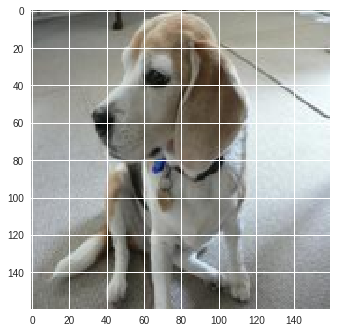

In [38]:
plt.imshow(training_images[8000])

In [39]:
# one hot encoded vectors
num_classes = 10

y_train = np_utils.to_categorical(training_labels, num_classes)
y_val = np_utils.to_categorical(validation_labels, num_classes)

print(y_train.shape, y_val.shape)

(12454, 10) (500, 10)


In [0]:
def naive():
    input_shape = (160, 160, 3)
    model = Sequential()
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    return model

In [0]:
# top 1 accuracy metric defined here

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__ = 'top1_acc'

In [41]:
def vgg_scratch():
    
    # NOT WEIGHTS! :@ 
    base_model = VGG16(weights=None,include_top=False,pooling='avg',input_shape=(160 , 160, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax', trainable=True)(X)  
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy', top1_acc]) 
    return model

model = None
model=vgg_scratch()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
bloc

In [42]:
print(training_images.shape, validation_images.shape, y_train.shape, y_val.shape)

(12454, 160, 160, 3) (500, 160, 160, 3) (12454, 10) (500, 10)


In [43]:
!ls

imagenetwoof-160  imagewoof-160.tgz  sample_data


In [0]:
#!rm -r vgg_scratch.h5

In [44]:
path_model='woofwoof.h5'  
K.set_value(model.optimizer.lr, 0.01) 

h=model.fit(x=training_images,     
            y=y_train,
          
            batch_size=128, 
            epochs=40, 
            
            verbose=1, 
            validation_data=(validation_images, y_val),
            
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Instructions for updating:
Use tf.cast instead.
Train on 12454 samples, validate on 500 samples
Epoch 1/40
12454/12454 [==============================] - 196s 16ms/step - loss: 2.0040 - acc: 0.2375 - top1_acc: 0.2375 - val_loss: 2.0036 - val_acc: 0.2260 - val_top1_acc: 0.2260
Epoch 2/40
12454/12454 [==============================] - 170s 14ms/step - loss: 1.9250 - acc: 0.2716 - top1_acc: 0.2716 - val_loss: 1.9868 - val_acc: 0.2340 - val_top1_acc: 0.2340
Epoch 3/40
12454/12454 [==============================] - 170s 14ms/step - loss: 1.8858 - acc: 0.2869 - top1_acc: 0.2869 - val_loss: 1.8905 - val_acc: 0.3080 - val_top1_acc: 0.3080
Epoch 4/40
12454/12454 [==============================] - 170s 14ms/step - loss: 1.8486 - acc: 0.3005 - top1_acc: 0.3005 - val_loss: 1.9407 - val_acc: 0.2320 - val_top1_acc: 0.2320
Epoch 5/40
12454/12454 [==============================] - 170s 14ms/step - loss: 1.8230 - acc: 0.3065 - top1_acc: 0.3065 - val_loss: 1.9531 - val_acc: 0.2460 - val_top1_acc: 0.2460

| Experiments | Train | Validation  | Test | Others 
|------|------|------|------|------|
|   1   | ?? | ??   | N/A  |  30 epochs, dim=160, bs=128, loss = cat_cross_entropy
|   2   |xx | xx  | N/A | xx
|   3   | xx| xx   | xx  |  xx

In [0]:
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid('on')
    plt.show()
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid('on')
    plt.show()

In [46]:
!ls

imagenetwoof-160  imagewoof-160.tgz  sample_data  woofwoof.h5


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


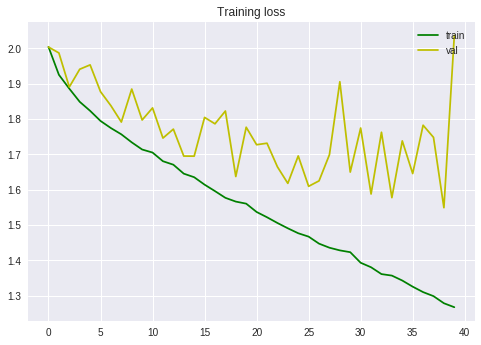

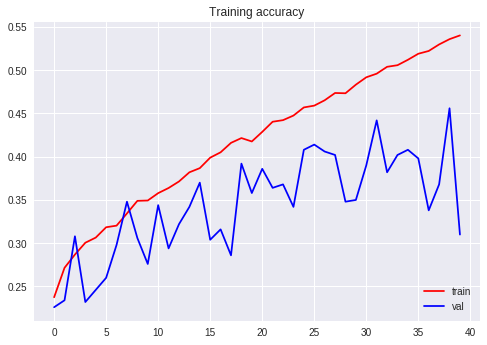

In [47]:
plot_loss_accu(h)

In [48]:
print(model.metrics_names)

['loss', 'acc', 'top1_acc']


In [50]:
# Score trained model.

scores = model.evaluate(validation_images, y_val, verbose=1)

#print(scores)
print('Test loss:', scores[0])
print('Test accuracy in %:', scores[1] * 100)

500/500 [==============================] - 3s 5ms/step
Test loss: 2.0365012102127076
Test accuracy in %: 30.99999995231628


In [0]:
print("The End")